# Projeto: Educação no Rio de Janeiro utilizando a API do Foursquare

A universidade do Brasil, atual UFRJ, foi a primeira sede de um curso de educação superior no Brasil.
O Prédio até então - ironicamente ou não - era destinado as atividades de um hospício.

Utilizando a API do Foursquare foi capturada uma amostra de 50 faculdades do Rio de Janeiro.

O objetivo é entender como uma faculdade ativa o comércio local.

Nesse sentido, dada a localização geográfica de cada faculdade de nossa amostra, estuda-se o entorno geográfico a fim
de capturar a perfil microeconômico que circunda o centro universitário.

In [2]:
# Importando bibliotecas

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [3]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [4]:
# Credenciais

CLIENT_ID = 'V1LOVQB4XZUTGAC4ZDDDMM1QCZC2YMGL04BKX0DT3GLGQJ11' # your Foursquare ID
CLIENT_SECRET = 'XH31TF3YQMFVCNF0WUFEU2YVCBXQ4FWMRFKKJ1FDEEKS35DU' # your Foursquare Secret
ACCESS_TOKEN = 'Z1WTANDL2KHSY43LPI220P2VQ2YTEIHEUA1ENRJM2CA32TE1' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V1LOVQB4XZUTGAC4ZDDDMM1QCZC2YMGL04BKX0DT3GLGQJ11
CLIENT_SECRET:XH31TF3YQMFVCNF0WUFEU2YVCBXQ4FWMRFKKJ1FDEEKS35DU


In [5]:
# Ponto de partida:
# Universidade do Brasil
latitude = -22.9523336
longitude = -43.1766622

In [6]:
# Query
search_query = 'Faculdade'
radius = 50000
#print(search_query + ' .... OK!')

In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V1LOVQB4XZUTGAC4ZDDDMM1QCZC2YMGL04BKX0DT3GLGQJ11&client_secret=XH31TF3YQMFVCNF0WUFEU2YVCBXQ4FWMRFKKJ1FDEEKS35DU&ll=-22.9523336,-43.1766622&oauth_token=Z1WTANDL2KHSY43LPI220P2VQ2YTEIHEUA1ENRJM2CA32TE1&v=20180604&query=Faculdade&radius=50000&limit=100'

In [8]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '616f7cc984bdf81ff5bd3e7c'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4f58f853e4b09ba0e3a22422',
    'name': 'Faculdade de Educação',
    'location': {'address': 'UFRJ Campus Praia Vermelha',
     'lat': -22.952498380284172,
     'lng': -43.1749881737035,
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.952498380284172,
       'lng': -43.1749881737035}],
     'distance': 172,
     'postalCode': '22290-902',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'state': 'RJ',
     'country': 'Brasil',
     'formattedAddress': ['UFRJ Campus Praia Vermelha',
      'Rio de Janeiro, RJ',
      '22290-902']},
    'categories': [{'id': '4bf58dd8d48988d1a8941735',
      'name': 'General College & University',
      'pluralName': 'General Colleges & Universities',
      'shortName': 'Education',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/other_',

In [9]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-9-5acf500bf9ad>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4f58f853e4b09ba0e3a22422,Faculdade de Educação,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1634696394,False,UFRJ Campus Praia Vermelha,-22.952498,-43.174988,"[{'label': 'display', 'lat': -22.9524983802841...",172,22290-902,BR,Rio de Janeiro,RJ,Brasil,"[UFRJ Campus Praia Vermelha, Rio de Janeiro, R...",NaN,NaN
1,4de7818d7d8b1f2dd298e37e,Faculdade de Educação,"[{'id': '4bf58dd8d48988d1ac941735', 'name': 'C...",v-1634696394,False,NaN,-22.952570,-43.175300,"[{'label': 'display', 'lat': -22.9525702675144...",142,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rio de Janeiro, RJ]",NaN,NaN
2,5050cdfde4b0269baa162a82,Sala 240 - Faculdade de Educação,"[{'id': '4bf58dd8d48988d1a0941735', 'name': 'C...",v-1634696394,False,NaN,-22.952747,-43.175348,"[{'label': 'display', 'lat': -22.9527467372824...",142,NaN,BR,NaN,NaN,Brasil,NaN,NaN,NaN
3,50573b84e4b0cbb61bc4a469,Faculdade de História,"[{'id': '4bf58dd8d48988d19d941735', 'name': 'C...",v-1634696394,False,UNIRIO Campus 458,-22.953875,-43.174364,"[{'label': 'display', 'lat': -22.9538752945596...",291,22290-240,BR,Rio de Janeiro,RJ,Brasil,"[UNIRIO Campus 458, Rio de Janeiro, RJ, 22290-...",NaN,NaN
4,4e138d75b61c18a826fa18a4,Faculdade São Leopoldo Mandic,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1634696394,False,"R. Gago Coutinho, 55",-22.931460,-43.181325,"[{'label': 'display', 'lat': -22.9314602896907...",2372,22240-000,BR,Rio de Janeiro,RJ,Brasil,"[R. Gago Coutinho, 55 (Laranjeiras), Rio de Ja...",Laranjeiras,NaN


In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Faculdade de Educação,General College & University,UFRJ Campus Praia Vermelha,-22.952498,-43.174988,"[{'label': 'display', 'lat': -22.9524983802841...",172,22290-902,BR,Rio de Janeiro,RJ,Brasil,"[UFRJ Campus Praia Vermelha, Rio de Janeiro, R...",NaN,4f58f853e4b09ba0e3a22422
1,Faculdade de Educação,College Theater,NaN,-22.952570,-43.175300,"[{'label': 'display', 'lat': -22.9525702675144...",142,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rio de Janeiro, RJ]",NaN,4de7818d7d8b1f2dd298e37e
2,Sala 240 - Faculdade de Educação,College Classroom,NaN,-22.952747,-43.175348,"[{'label': 'display', 'lat': -22.9527467372824...",142,NaN,BR,NaN,NaN,Brasil,NaN,NaN,5050cdfde4b0269baa162a82
3,Faculdade de História,College History Building,UNIRIO Campus 458,-22.953875,-43.174364,"[{'label': 'display', 'lat': -22.9538752945596...",291,22290-240,BR,Rio de Janeiro,RJ,Brasil,"[UNIRIO Campus 458, Rio de Janeiro, RJ, 22290-...",NaN,50573b84e4b0cbb61bc4a469
4,Faculdade São Leopoldo Mandic,General College & University,"R. Gago Coutinho, 55",-22.931460,-43.181325,"[{'label': 'display', 'lat': -22.9314602896907...",2372,22240-000,BR,Rio de Janeiro,RJ,Brasil,"[R. Gago Coutinho, 55 (Laranjeiras), Rio de Ja...",Laranjeiras,4e138d75b61c18a826fa18a4
5,Secretaria - Faculdade de Educação,College Administrative Building,NaN,-22.952093,-43.174652,"[{'label': 'display', 'lat': -22.952093, 'lng'...",207,NaN,BR,NaN,NaN,Brasil,NaN,NaN,5658594e498ed1bb999699d9
6,Faculdades Integradas Hélio Alonso (Facha),University,"R. Muniz Barreto, 51",-22.942699,-43.182551,"[{'label': 'display', 'lat': -22.9426986105173...",1230,22251-090,BR,Rio de Janeiro,RJ,Brasil,"[R. Muniz Barreto, 51 (Campus Botafogo), Rio d...",Campus Botafogo,4bb0f959f964a5203d6f3ce3
7,Faculdade de Filosofia UNIRIO,College History Building,NaN,-22.954729,-43.168934,"[{'label': 'display', 'lat': -22.9547290802001...",835,NaN,BR,NaN,NaN,Brasil,NaN,NaN,4f75f9a8e4b02ca6e4d427b9
8,Faculdade Senac Santa Luzia,University,"R. Sta. Luzia, 735, 2º Andar",-22.910942,-43.174184,"[{'label': 'display', 'lat': -22.9109419326236...",4614,20030-041,BR,Rio de Janeiro,RJ,Brasil,"[R. Sta. Luzia, 735, 2º Andar (R. México), Rio...",R. México,4c6fe600df6b8cfa5369b64d
9,"Faculdade de Turismo e Hotelaria, Bloco H - UFF",College Academic Building,Campus do Gragoatá,-22.897390,-43.133110,"[{'label': 'display', 'lat': -22.8973899016762...",7572,NaN,BR,Niterói,RJ,Brasil,"[Campus do Gragoatá, Niterói, RJ]",NaN,517e843d498ea18a02ec9b75


In [11]:
dataframe_filtered.name

0                                 Faculdade de Educação
1                                 Faculdade de Educação
2                      Sala 240 - Faculdade de Educação
3                                 Faculdade de História
4                         Faculdade São Leopoldo Mandic
5                    Secretaria - Faculdade de Educação
6            Faculdades Integradas Hélio Alonso (Facha)
7                         Faculdade de Filosofia UNIRIO
8                           Faculdade Senac Santa Luzia
9       Faculdade de Turismo e Hotelaria, Bloco H - UFF
10                             Faculdade de Arquitetura
11                Faculdade Presbiteriana Mackenzie Rio
12                  Faculdade Nacional de Direito (FND)
13                Faculdade de Administração e Finanças
14                           Faculdade Metodista Benett
15                        Faculdade de Direito - Sala 1
16                          Faculdade de Serviço Social
17                      Faculdade de Engenharia 

In [12]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [13]:
# Entender como escolas e universidades ativam a economia local
# compreender o impacto da educação diretamente no plano microeconomico local
# Decidir onde abrir uma escola ? Quais os impactos 
# o entorno das escolas, suas vias de acesso e o comércio que as cincunda 

In [14]:
#dataframe_filtered [lat, lng]
resultados = []
for i, row in dataframe_filtered.iterrows():
    venue_id = row['id'] 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    resultados.append(requests.get(url).json())

In [15]:
resultados = []
for i, row in dataframe_filtered.iterrows():
    latitude = row['lat']
    longitude =  row ['lng']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
    resultados.append(requests.get(url).json())

In [16]:
df = pd.DataFrame(columns = ['nome_faculdade', 'id','nome_estabelecimento', 'estabelecimento_id' , 'categoria_short', 'categoria_plural', 'latitude', 'longitude', 'distancia'])
contador = 0
for faculdade in resultados:
    faculdade_id = dataframe_filtered['id'][contador]
    nome_faculdade = dataframe_filtered['name'][contador]
    contador += 1
    estabelecimentos = faculdade['response']['venues']
    for estabelecimento in estabelecimentos:
        nome = estabelecimento['name']
        estabelecimento_id = estabelecimento['id']
        latitude = estabelecimento['location']['lat']
        longitude = estabelecimento['location']['lng']
        distancia = estabelecimento['location']['distance']
        try:
            categoria_short = estabelecimento['categories'][0]['shortName']
            categoria_plural = estabelecimento['categories'][0]['pluralName']
        except:
            categoria_short = None
            categoria_plural = None
        df = df.append({'nome_faculdade': nome_faculdade, 'id': faculdade_id,'nome_estabelecimento': nome, 'estabelecimento_id': estabelecimento_id, 'categoria_short': categoria_short, 'categoria_plural': categoria_plural, 'latitude': latitude, 'longitude': longitude ,'distancia': distancia}, ignore_index = True)

In [17]:
df

,nome_faculdade,id,nome_estabelecimento,estabelecimento_id,categoria_short,categoria_plural,latitude,longitude,distancia
0,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Education,General Colleges & Universities,-22.952498,-43.174988,0
1,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Coordenadoria de Saúde AP 2.1,4d9cdbe58efaa143a79157b7,Government,Government Buildings,-22.952951,-43.175159,53
2,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Escola de Comunicação,4bad5993f964a52007493be3,Communications,College Communications Buildings,-22.952750,-43.175239,37
3,Faculdade de Educação,4f58f853e4b09ba0e3a22422,CPM - ECO/UFRJ,4bebeed4183895213f010bcf,Lab,College Labs,-22.952759,-43.175019,29
4,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,Theater,College Theaters,-22.952570,-43.175300,32
...,...,...,...,...,...,...,...,...,...
4783,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,Tenda Santander,591f3512dff81575e6a8d9de,Quad,College Quads,-22.898275,-43.132065,112
4784,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,(en)canto,5199c5d2498ef3749b958c3e,Housing Development,Housing Developments,-22.899470,-43.130503,298
4785,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,Corpus Icaraí,5023b615e4b0b3d65b7d05ac,Gym / Fitness,Gyms or Fitness Centers,-22.899248,-43.130622,278
4786,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,Mãe D'água,4e41d75db0fb09b608686354,Bar,Bars,-22.899298,-43.130506,291


In [18]:
df.categoria_short.value_counts()

Lab                        316
Classroom                  298
University                 209
Office                     203
Administrative Building    174
                          ... 
Spanish                      1
Mediterranean                1
History Museum               1
Health Food Store            1
Arcade                       1
Name: categoria_short, Length: 354, dtype: int64

In [19]:
lista = ['Classroom','Lab','University', 'Administrative Building', 'Office', 'Auditorium', 'Student Center' , 'Education' , 'Academic Building', 'Library', 'Residential','Building']
for i in lista:
    df.drop(df[df['categoria_short'] == i].index, axis = 0, inplace = True)
    

In [20]:
df

,nome_faculdade,id,nome_estabelecimento,estabelecimento_id,categoria_short,categoria_plural,latitude,longitude,distancia
1,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Coordenadoria de Saúde AP 2.1,4d9cdbe58efaa143a79157b7,Government,Government Buildings,-22.952951,-43.175159,53
2,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Escola de Comunicação,4bad5993f964a52007493be3,Communications,College Communications Buildings,-22.952750,-43.175239,37
4,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,Theater,College Theaters,-22.952570,-43.175300,32
8,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Sabores da Serra Sorveteria,566ed9f3498e7d6394668557,Ice Cream,Ice Cream Shops,-22.950616,-43.175021,209
10,Faculdade de Educação,4f58f853e4b09ba0e3a22422,Pérgula da Piscina,51450e74e4b0751899297260,Outdoor Event Space,Outdoor Event Spaces,-22.950605,-43.175021,210
...,...,...,...,...,...,...,...,...,...
4782,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,Yakisoba do Tatuí,55ce8828498eecb77e8584ee,Food Truck,Food Trucks,-22.899288,-43.130741,268
4783,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,Tenda Santander,591f3512dff81575e6a8d9de,Quad,College Quads,-22.898275,-43.132065,112
4784,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,(en)canto,5199c5d2498ef3749b958c3e,Housing Development,Housing Developments,-22.899470,-43.130503,298
4785,UFF - Faculdade de Educação,4eb06629775bbddde7b57f14,Corpus Icaraí,5023b615e4b0b3d65b7d05ac,Gym / Fitness,Gyms or Fitness Centers,-22.899248,-43.130622,278


In [21]:
pd.value_counts(df['categoria_short'])

Bar                 70
Brazilian           65
Hospital            63
Doctor's Office     61
Restaurant          56
                    ..
Capitol Building     1
Storage              1
Butcher              1
Food                 1
Arcade               1
Name: categoria_short, Length: 342, dtype: int64

In [22]:
df[df['categoria_short'] == 'Brazilian']

,nome_faculdade,id,nome_estabelecimento,estabelecimento_id,categoria_short,categoria_plural,latitude,longitude,distancia
80,Faculdade de Educação,4f58f853e4b09ba0e3a22422,oficina do chopp,4f56ad64e4b0f52af60712b5,Brazilian,Brazilian Restaurants,-22.952377,-43.176186,123
169,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,Padaria Botafogo,5277bd7711d2b62f0ecd9a83,Brazilian,Brazilian Restaurants,-22.953655,-43.175293,120
178,Faculdade de Educação,4de7818d7d8b1f2dd298e37e,oficina do chopp,4f56ad64e4b0f52af60712b5,Brazilian,Brazilian Restaurants,-22.952377,-43.176186,93
262,Sala 240 - Faculdade de Educação,5050cdfde4b0269baa162a82,Padaria Botafogo,5277bd7711d2b62f0ecd9a83,Brazilian,Brazilian Restaurants,-22.953655,-43.175293,101
284,Sala 240 - Faculdade de Educação,5050cdfde4b0269baa162a82,Restaurante Caldeirão,4cbf05691c6c6dcb01eb6b5e,Brazilian,Brazilian Restaurants,-22.953577,-43.175868,106
...,...,...,...,...,...,...,...,...,...
4599,Faculdade Cruzeiro do Sul EAD,58926c14b792071c9e581ed9,Restaurante da Urca,503d5f24e4b0ee7454ebc3b1,Brazilian,Brazilian Restaurants,-22.907643,-43.173399,102
4652,Faculdade Cruzeiro do Sul EAD,58926c14b792071c9e581ed9,Tempêro Brasileiro,4eb01a4fb634097eca7bc799,Brazilian,Brazilian Restaurants,-22.906499,-43.173678,88
4661,Faculdade Cruzeiro do Sul EAD,58926c14b792071c9e581ed9,Symbol Gourmet,4bd5daa24e32d13ad098c180,Brazilian,Brazilian Restaurants,-22.907026,-43.173737,88
4663,Faculdade Cruzeiro do Sul EAD,58926c14b792071c9e581ed9,Golositá Restaurante,4d2c7b916e27a1438a9f4124,Brazilian,Brazilian Restaurants,-22.905999,-43.173480,111


In [23]:
barras = pd.value_counts(df['categoria_short'])

In [24]:
barras[0]

70

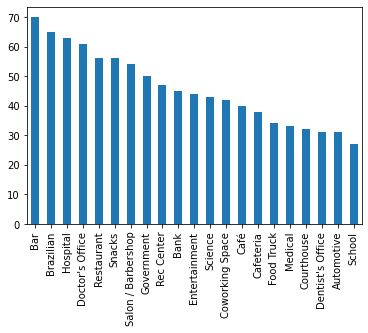

In [25]:
# Top 20 estabelecimentos comerciais próximos a faculdades no Rio de Janeiro
import matplotlib.pyplot as plt
barras[:21].plot.bar()
plt.show()

In [26]:
# Convertendo a distância para inteiros
df.distancia = df.distancia.astype(int)

In [27]:
quantidade_estabelecimentos_por_faculdade = df.groupby(by = ['nome_faculdade'])['categoria_short'].count()
quantidade_estabelecimentos_por_faculdade

nome_faculdade
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças)     25
Colégio e Faculdade Silva e Souza                                     78
FGEL - Faculdade de Geologia                                          29
Faculdade                                                             68
Faculdade Béthencourt da Silva - FABES                                85
Faculdade Cruzeiro do Sul EAD                                         72
Faculdade De Direito Uff sala 01                                      41
Faculdade Gama Filho Piedade                                          68
Faculdade Gama e Souza                                                86
Faculdade Metodista Benett                                            76
Faculdade Moraes Junior                                               37
Faculdade Nacional de Direito (FND)                                   62
Faculdade Pinheiro Guimarães                                          81
Faculdade Presbiteriana Mackenzie Ri

In [46]:
# Top 10 faculdades com economia mais ativa
quantidade_estabelecimentos_por_faculdade.sort_values(ascending = False).head(10)

nome_faculdade
Faculdade de Educação                     112
Faculdade de Direito                      110
UFF - Faculdade de Economia                94
Faculdade Presbiteriana Mackenzie Rio      89
Faculdade Gama e Souza                     86
Faculdade Béthencourt da Silva - FABES     85
faculdade estacio de sa                    82
Faculdade São Leopoldo Mandic              82
Faculdade Pinheiro Guimarães               81
Faculdade de Enfermagem                    79
Name: categoria_short, dtype: int64

In [47]:
# Top 10 faculdades com economia mais inativa
quantidade_estabelecimentos_por_faculdade.sort_values().head(10)

nome_faculdade
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças)    25
Faculdade de Arqueologia- UERJ                                       26
Faculdade de Engenharia Química                                      27
Faculdade de Farmácia - UFRJ                                         27
Faculdade de Comunicação Social (FCS)                                27
FGEL - Faculdade de Geologia                                         29
Faculdade de Economia                                                30
Faculdade de Administração e Finanças                                30
Faculdade de Letras                                                  31
Faculdade de Serviço Social                                          31
Name: categoria_short, dtype: int64

In [28]:
media_distancia_faculda_ate_estabelecimento = round(df.groupby(by = ['nome_faculdade'])['distancia'].mean(),2)
media_distancia_faculda_ate_estabelecimento

nome_faculdade
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças)      55.35
Colégio e Faculdade Silva e Souza                                     132.84
FGEL - Faculdade de Geologia                                           62.32
Faculdade                                                            1610.79
Faculdade Béthencourt da Silva - FABES                                671.37
Faculdade Cruzeiro do Sul EAD                                          72.20
Faculdade De Direito Uff sala 01                                       69.41
Faculdade Gama Filho Piedade                                          116.57
Faculdade Gama e Souza                                                209.70
Faculdade Metodista Benett                                            352.84
Faculdade Moraes Junior                                                77.16
Faculdade Nacional de Direito (FND)                                   120.60
Faculdade Pinheiro Guimarães                                 

In [49]:
# Top 5 faculdades isoladas
# faculdades mais distantes do comércio
media_distancia_faculda_ate_estabelecimento.sort_values(ascending = False).head()

nome_faculdade
Faculdade                                          1610.79
Faculdade Béthencourt da Silva - FABES              671.37
Faculdade Metodista Benett                          352.84
Faculdade de Medicina (UFRJ)                        318.68
Faculdade de Turismo e Hotelaria, Bloco H - UFF     273.96
Name: distancia, dtype: float64

In [50]:
# Top 5 faculdades movimentadas
# faculdades mais distantes do comércio
media_distancia_faculda_ate_estabelecimento.sort_values().head()

nome_faculdade
Faculdade Senac Santa Luzia    35.44
Faculdade de Economia          41.84
Faculdade de Letras            43.62
Faculdade de São Bento         45.36
Faculdade de Serviço Social    46.16
Name: distancia, dtype: float64

In [29]:
media_distancia_faculda_ate_estabelecimento_por_categoria = df.groupby(by = ['nome_faculdade', 'categoria_short'])['distancia'].mean()
media_distancia_faculda_ate_estabelecimento_por_categoria

nome_faculdade                                                     categoria_short
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças)  Cafeteria           57.00
                                                                   Coworking Space     28.00
                                                                   Desserts            50.00
                                                                   Diner               79.00
                                                                   Engineering         46.25
                                                                                       ...  
faculdade estacio de sa                                            Tech Startup       163.00
                                                                   Trade School       249.00
                                                                   Tunnel             247.00
                                                                   Vacation Rent

In [30]:
# Média

In [31]:
# Desvio Padrão da distância

In [32]:
std_estabelecimentos_por_faculdade = df.groupby(by = ['nome_faculdade'])['distancia'].std()
#std_estabelecimentos_por_faculdade = df.std()

In [33]:
std_estabelecimentos_por_faculdade

nome_faculdade
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças)       24.967086
Colégio e Faculdade Silva e Souza                                       51.723081
FGEL - Faculdade de Geologia                                            21.558273
Faculdade                                                            13087.779693
Faculdade Béthencourt da Silva - FABES                                 129.339263
Faculdade Cruzeiro do Sul EAD                                           49.154456
Faculdade De Direito Uff sala 01                                        34.969255
Faculdade Gama Filho Piedade                                            59.115449
Faculdade Gama e Souza                                                  85.670199
Faculdade Metodista Benett                                            2179.197458
Faculdade Moraes Junior                                                 36.279341
Faculdade Nacional de Direito (FND)                                    113.354502
F

# Clusterização com K-Means

In [34]:
# utilizando a distância como métrica , média e densidade

In [35]:
df_final = pd.DataFrame({'quantidade_estabelecimentos_por_faculdade':quantidade_estabelecimentos_por_faculdade,
                         'media_distancia_faculda_ate_estabelecimento':media_distancia_faculda_ate_estabelecimento,
                         'std_estabelecimentos_por_faculdade':std_estabelecimentos_por_faculdade})

In [36]:
df_final

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade
nome_faculdade,,,
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças),25,55.35,24.967086
Colégio e Faculdade Silva e Souza,78,132.84,51.723081
FGEL - Faculdade de Geologia,29,62.32,21.558273
Faculdade,68,1610.79,13087.779693
Faculdade Béthencourt da Silva - FABES,85,671.37,129.339263
Faculdade Cruzeiro do Sul EAD,72,72.20,49.154456
Faculdade De Direito Uff sala 01,41,69.41,34.969255
Faculdade Gama Filho Piedade,68,116.57,59.115449
Faculdade Gama e Souza,86,209.70,85.670199


In [37]:
df_final.shape

(46, 3)

In [38]:
# Normalização do Banco de Dados
data = df_final.values
data

array([[   25.        ,    55.35      ,    24.96708603],
       [   78.        ,   132.84      ,    51.72308051],
       [   29.        ,    62.32      ,    21.55827312],
       [   68.        ,  1610.79      , 13087.77969333],
       [   85.        ,   671.37      ,   129.33926336],
       [   72.        ,    72.2       ,    49.15445581],
       [   41.        ,    69.41      ,    34.96925479],
       [   68.        ,   116.57      ,    59.11544894],
       [   86.        ,   209.7       ,    85.67019883],
       [   76.        ,   352.84      ,  2179.19745811],
       [   37.        ,    77.16      ,    36.27934139],
       [   62.        ,   120.6       ,   113.35450241],
       [   81.        ,   114.91      ,   203.52238941],
       [   89.        ,    90.        ,   126.24588101],
       [   64.        ,    35.44      ,    27.16361831],
       [   82.        ,    85.1       ,    39.53078594],
       [   30.        ,    52.87      ,    26.25229125],
       [   26.        ,    76.1

In [63]:
X = df_final.values

In [39]:
from sklearn.preprocessing import StandardScaler
cluster_dataset = StandardScaler().fit_transform(data)

In [40]:
# Modelagem: Aplicando o algoritmo K-Means 

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(data)
labels = k_means.labels_
print(labels)

[0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [61]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[   56.52272727,   120.39409091,    74.06920439],
       [   68.        ,  1610.79      , 13087.77969333],
       [   76.        ,   352.84      ,  2179.19745811]])

In [41]:
data_scaled = pd.DataFrame(cluster_dataset, index=df_final.index, columns=df_final.columns)

In [42]:
# dados normalizados
data_scaled

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade
nome_faculdade,,,
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças),-1.351644,-0.423615,-0.197069
Colégio e Faculdade Silva e Souza,0.873412,-0.103353,-0.183112
FGEL - Faculdade de Geologia,-1.183715,-0.394809,-0.198847
Faculdade,0.453590,6.004934,6.617286
Faculdade Béthencourt da Silva - FABES,1.167287,2.122362,-0.142622
Faculdade Cruzeiro do Sul EAD,0.621519,-0.353975,-0.184451
Faculdade De Direito Uff sala 01,-0.679929,-0.365506,-0.191851
Faculdade Gama Filho Piedade,0.453590,-0.170596,-0.179255
Faculdade Gama e Souza,1.209269,0.214305,-0.165403


<AxesSubplot:>

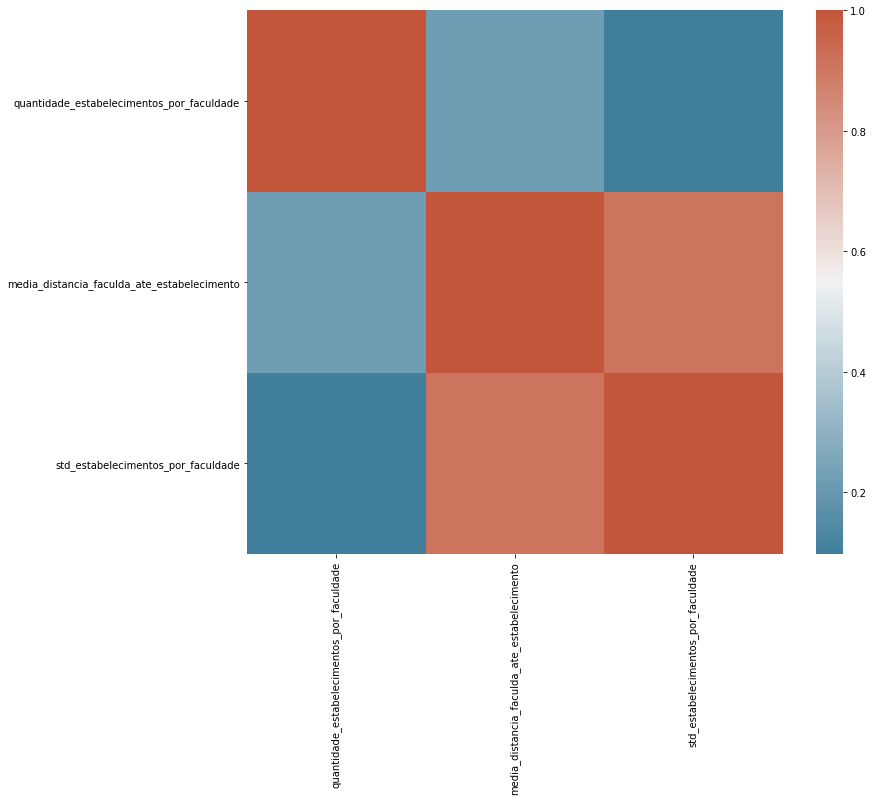

In [51]:
import seaborn as sns
corr = data_scaled.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(corr, ax=ax, cmap=cmap)

In [53]:
# Adicionando a Clusterização ao dataset normalizado
data_scaled["Cluster"] = labels
data_scaled.head(10)

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade,Cluster
nome_faculdade,,,,
CAFAF (Centro Acadêmico da Faculdade de Administração e Finanças),-1.351644,-0.423615,-0.197069,0
Colégio e Faculdade Silva e Souza,0.873412,-0.103353,-0.183112,0
FGEL - Faculdade de Geologia,-1.183715,-0.394809,-0.198847,0
Faculdade,0.453590,6.004934,6.617286,1
Faculdade Béthencourt da Silva - FABES,1.167287,2.122362,-0.142622,0
Faculdade Cruzeiro do Sul EAD,0.621519,-0.353975,-0.184451,0
Faculdade De Direito Uff sala 01,-0.679929,-0.365506,-0.191851,0
Faculdade Gama Filho Piedade,0.453590,-0.170596,-0.179255,0
Faculdade Gama e Souza,1.209269,0.214305,-0.165403,0


# No clustering os dados não são rotulados e o processo não é supervisionado. Divide-se os dados em grupos mutuamente exclusivos chamados de 
Clusters:  agrupamentos que compartilham atributos semelhantes


In [55]:
# verificar valores do centroide através da média das colunas de cada cluster
data_scaled.groupby('Cluster').mean()

,quantidade_estabelecimentos_por_faculdade,media_distancia_faculda_ate_estabelecimento,std_estabelecimentos_por_faculdade
Cluster,,,
0,-0.028251,-0.154792,-0.171454
1,0.453590,6.004934,6.617286
2,0.789448,0.805895,0.926708


<ipython-input-56-5899f8ee9f84>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(data[:, 0], data[:, 1], s=None, c=labels.astype(np.float), alpha=0.5)


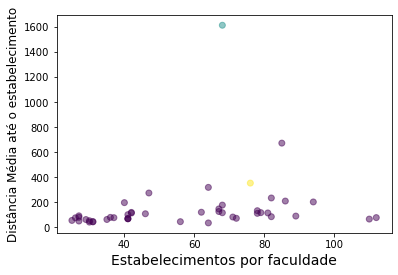

In [56]:
# Distribuição das faculdades de acordo com a quantidade de estabelecimentos próximos e a distância média até eles 
plt.scatter(data[:, 0], data[:, 1], s=None, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Estabelecimentos por faculdade', fontsize=14)
plt.ylabel('Distância Média até o estabelecimento', fontsize=12)

plt.show()

<ipython-input-57-2eab5e882eec>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-57-2eab5e882eec>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c= labels.astype(np.float))


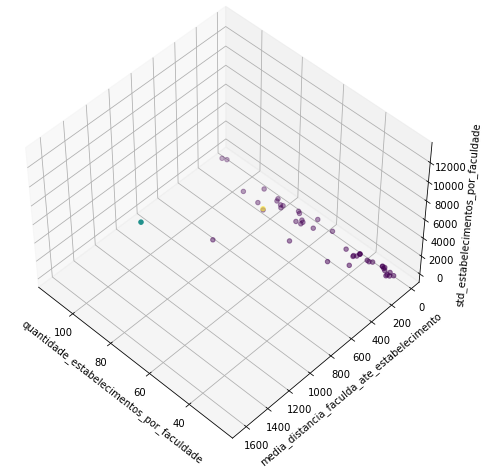

In [57]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('quantidade_estabelecimentos_por_faculdade')
ax.set_ylabel('media_distancia_faculda_ate_estabelecimento')
ax.set_zlabel('std_estabelecimentos_por_faculdade')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c= labels.astype(np.float))

# Aplicando o K-Means foi possível dividir as faculdades cariocas em três grupos mutuamente exclusivos. Cada cluster possui faculdades semelhantes entre si.
# POdemos criar um perfil de faculdade para cada segmento, considerando as caracteristicas comuns de cada cluster  

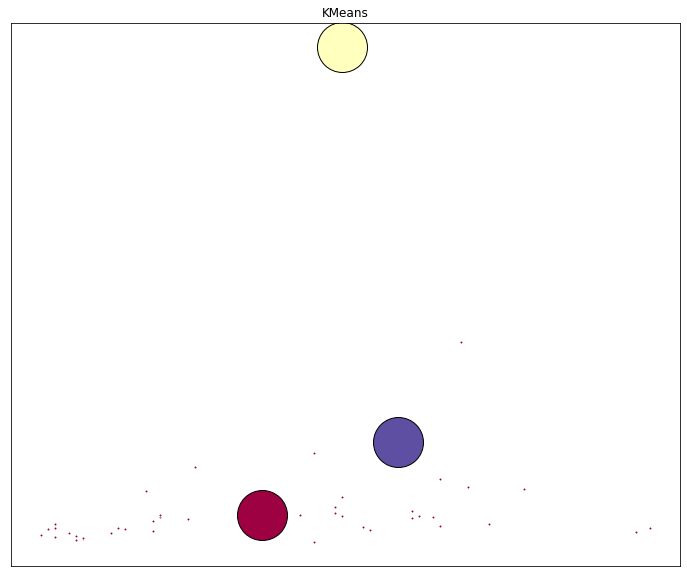

In [67]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=50)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()